# San Francisco Airport

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.max_columns",100)
pd.set_option("display.max_rows",100)

In [2]:
#importing data
df=pd.read_csv('air-traffic-passenger-statistics.csv')

# EDA - Explorary Data Analysis

In [3]:
df.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090


In [4]:
df.describe()

,Activity Period,Passenger Count
count,18885.000000,18885.000000
mean,201179.285994,29876.744400
std,385.755460,60626.072969
min,200507.000000,1.000000
25%,200811.000000,5352.000000
50%,201204.000000,9170.000000
75%,201509.000000,20718.000000
max,201806.000000,659837.000000


In [5]:
df.shape

(18885, 12)

In [6]:
df.columns

Index(['Activity Period', 'Operating Airline', 'Operating Airline IATA Code',
       'Published Airline', 'Published Airline IATA Code', 'GEO Summary',
       'GEO Region', 'Activity Type Code', 'Price Category Code', 'Terminal',
       'Boarding Area', 'Passenger Count'],
      dtype='object')

In [7]:
df.sample(10)

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
10154,201210,Hawaiian Airlines,HA,Hawaiian Airlines,HA,Domestic,US,Deplaned,Other,International,A,8351
142,200508,Asiana Airlines,OZ,Asiana Airlines,OZ,International,Asia,Deplaned,Other,International,A,4099
16285,201701,Hawaiian Airlines,HA,Hawaiian Airlines,HA,Domestic,US,Deplaned,Other,International,A,15763
9297,201202,WestJet Airlines,WS,WestJet Airlines,WS,International,Canada,Deplaned,Other,International,A,2
7034,201007,LAN Peru,LP,LAN Peru,LP,International,South America,Enplaned,Other,International,A,3030
18622,201805,Frontier Airlines,F9,Frontier Airlines,F9,Domestic,US,Enplaned,Low Fare,Terminal 1,B,8189
5119,200902,United Airlines - Pre 07/01/2013,UA,United Airlines - Pre 07/01/2013,UA,International,Australia / Oceania,Deplaned,Other,International,G,6438
8406,201107,Cathay Pacific,CX,Cathay Pacific,CX,International,Asia,Enplaned,Other,International,A,19186
16570,201703,SkyWest Airlines,OO,Delta Air Lines,DL,Domestic,US,Deplaned,Other,Terminal 1,C,30355
8360,201106,United Airlines - Pre 07/01/2013,UA,United Airlines - Pre 07/01/2013,UA,International,Australia / Oceania,Thru / Transit,Other,International,G,491


In [8]:
df['GEO Summary'].nunique()

2

In [9]:
df['GEO Region'].nunique()

9

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18885 entries, 0 to 18884
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Activity Period              18885 non-null  int64 
 1   Operating Airline            18885 non-null  object
 2   Operating Airline IATA Code  18822 non-null  object
 3   Published Airline            18885 non-null  object
 4   Published Airline IATA Code  18822 non-null  object
 5   GEO Summary                  18885 non-null  object
 6   GEO Region                   18885 non-null  object
 7   Activity Type Code           18885 non-null  object
 8   Price Category Code          18885 non-null  object
 9   Terminal                     18885 non-null  object
 10  Boarding Area                18885 non-null  object
 11  Passenger Count              18885 non-null  int64 
dtypes: int64(2), object(10)
memory usage: 1.7+ MB


In [11]:
df.isnull().sum()

Activity Period                 0
Operating Airline               0
Operating Airline IATA Code    63
Published Airline               0
Published Airline IATA Code    63
GEO Summary                     0
GEO Region                      0
Activity Type Code              0
Price Category Code             0
Terminal                        0
Boarding Area                   0
Passenger Count                 0
dtype: int64

# Filling The Missing Values

In [12]:
#I got this code from POE
df.loc[df['Operating Airline']== 'Servisair', 'Operating Airline IATA Code'] = 'SA'
df.loc[df['Published Airline']== 'Servisair', 'Published Airline IATA Code'] = 'SA'

df.loc[df['Operating Airline']== 'Swissport USA', 'Operating Airline IATA Code'] = 'SU'
df.loc[df['Published Airline']== 'Swissport USA', 'Published Airline IATA Code'] = 'SU'

df.loc[df['Operating Airline']== 'Pacific Aviation', 'Operating Airline IATA Code'] = 'PA'
df.loc[df['Published Airline']== 'Pacific Aviation', 'Published Airline IATA Code'] = 'PA'

df.loc[df['Operating Airline']== 'Trego Dugan Aviation', 'Operating Airline IATA Code'] = 'TDA'
df.loc[df['Published Airline']== 'Trego Dugan Aviation', 'Published Airline IATA Code'] = 'TDA'

df.loc[df['Operating Airline']== 'Boeing Company', 'Operating Airline IATA Code'] = 'BC'
df.loc[df['Published Airline']== 'Boeing Company', 'Published Airline IATA Code'] = 'BC'

In [13]:
df.isnull().sum()

Activity Period                0
Operating Airline              0
Operating Airline IATA Code    0
Published Airline              0
Published Airline IATA Code    0
GEO Summary                    0
GEO Region                     0
Activity Type Code             0
Price Category Code            0
Terminal                       0
Boarding Area                  0
Passenger Count                0
dtype: int64

In [14]:
df.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18885 entries, 0 to 18884
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Activity Period              18885 non-null  int64 
 1   Operating Airline            18885 non-null  object
 2   Operating Airline IATA Code  18885 non-null  object
 3   Published Airline            18885 non-null  object
 4   Published Airline IATA Code  18885 non-null  object
 5   GEO Summary                  18885 non-null  object
 6   GEO Region                   18885 non-null  object
 7   Activity Type Code           18885 non-null  object
 8   Price Category Code          18885 non-null  object
 9   Terminal                     18885 non-null  object
 10  Boarding Area                18885 non-null  object
 11  Passenger Count              18885 non-null  int64 
dtypes: int64(2), object(10)
memory usage: 1.7+ MB


In [16]:
df.isnull().sum()

Activity Period                0
Operating Airline              0
Operating Airline IATA Code    0
Published Airline              0
Published Airline IATA Code    0
GEO Summary                    0
GEO Region                     0
Activity Type Code             0
Price Category Code            0
Terminal                       0
Boarding Area                  0
Passenger Count                0
dtype: int64

In [17]:
df['Operating Airline IATA Code'].value_counts()

Operating Airline IATA Code
UA     3807
OO     1212
AS      891
VX      462
DL      445
AC      420
WN      390
AA      380
SY      317
F9      314
CA      313
NZ      313
JL      313
OZ      312
PR      312
LH      312
KE      312
KL      312
SQ      312
HA      312
NH      312
AF      312
BR      312
CI      312
VS      312
BA      312
TA      312
CX      312
B6      305
US      304
QX      256
NW      240
AM      234
EK      234
FL      226
CP      205
LX      193
QF      188
EI      152
WS      135
SK      126
MU      126
MX      124
YV      118
YX      116
MQ      106
LP       90
CZ       86
TK       78
EY       72
CM       68
AI       66
QK       64
AB       60
WW       56
SE       51
Y4       48
XJ       44
TZ       44
FJ       38
SA       36
XE       32
BF       24
NK       24
RW       24
EV       22
SU       22
FI       22
A8       22
MT       16
4T       16
GL       16
G4       16
9W       16
AY       12
HX       11
DH       10
4O        8
BBB       6
IB        6
WO        3


In [18]:
x=df.drop(['Activity Period','Published Airline IATA Code','Terminal'],axis=1)

In [19]:
# Label Encoding for IATA Codes
from sklearn.preprocessing import LabelEncoder

# Combine both columns into a single array 

label_encoder = LabelEncoder()

x['Operating Airline IATA Code'] = label_encoder.fit_transform(x['Operating Airline IATA Code'])

# x.sample(5)

In [20]:
df.drop_duplicates(inplace=True)

In [21]:
x=pd.get_dummies(x, drop_first=True)

In [22]:
#pip install yellowbrick

In [23]:
from sklearn import datasets
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

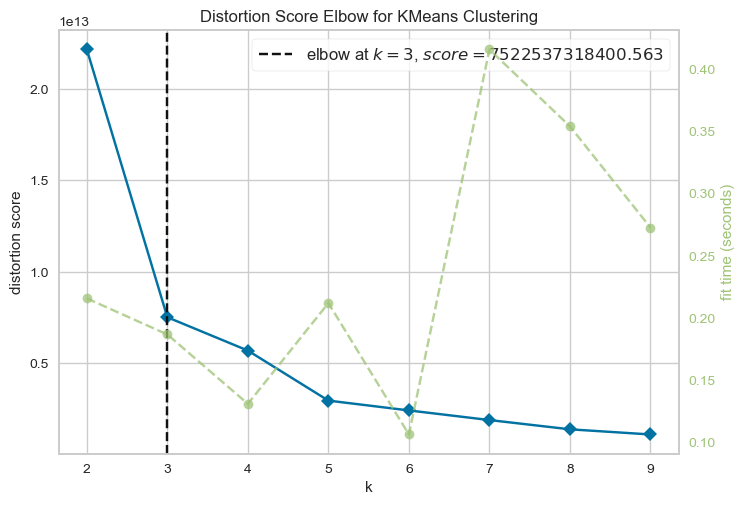

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [24]:
km=KMeans()
vis=KElbowVisualizer(km,k=(2,10))
vis.fit(x)
vis.show()

In [25]:
km=KMeans(n_clusters=3,random_state=42)

In [28]:
km.fit(x)

KMeans(n_clusters=3, random_state=42)

In [29]:
tahmin=km.predict(x)

In [30]:
tahmin

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [31]:
df['Cluster'] = tahmin

In [33]:
from sklearn.metrics import silhouette_score
silhouette_score(x, tahmin)

0.8285955939770048

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'US'),
  Text(1, 0, 'Canada'),
  Text(2, 0, 'Asia'),
  Text(3, 0, 'Europe'),
  Text(4, 0, 'Australia / Oceania'),
  Text(5, 0, 'Mexico'),
  Text(6, 0, 'Central America'),
  Text(7, 0, 'Middle East'),
  Text(8, 0, 'South America')])

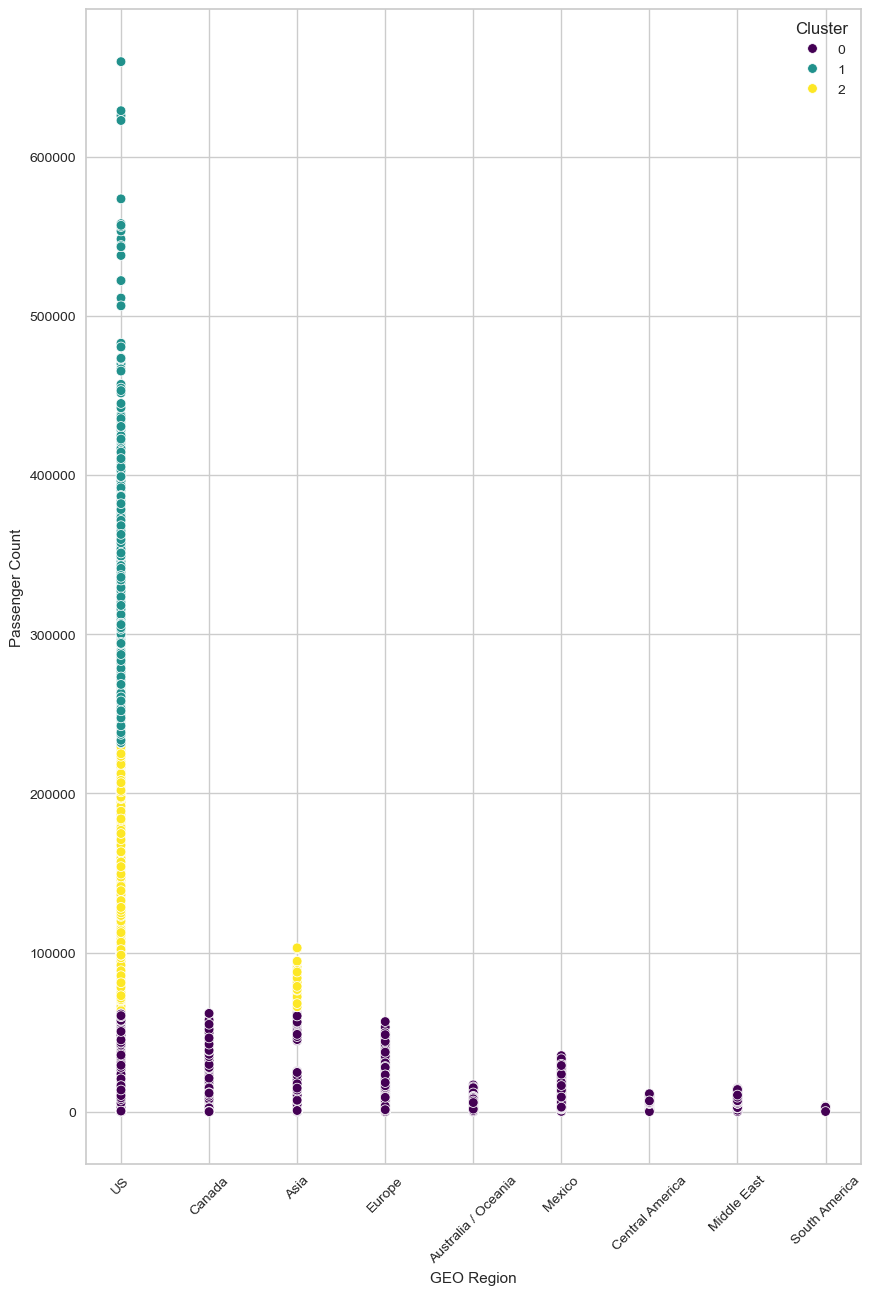

In [38]:
plt.figure(figsize=(10,15))
sns.scatterplot(x='GEO Region',y='Passenger Count' ,hue='Cluster', data=df, palette='viridis' )
plt.xticks(rotation=45)